In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
import gc


In [2]:
train_data = pd.read_csv('tokenized.csv' )
train_data['text'] = train_data['company_profile'] + ' ' + train_data['description'] + ' ' + train_data['requirements'] + ' ' + train_data['benefits']
train_data.head()

,company_profile,description,requirements,benefits,fraudulent,text,tokens
0,"['food52', 'create', 'groundbreaking', 'award'...","['food52', 'fast', 'grow', 'jam', 'beard', 'aw...","['experience', 'content', 'management', 'syste...",['unspecified'],0,"['food52', 'create', 'groundbreaking', 'award'...","['food52', 'create', 'groundbreaking', 'award'..."
1,"['90', 'second', 'worlds', 'cloud', 'video', '...","['organise', 'focus', 'vibrant', 'awesome', 'p...","['expect', 'key', 'responsibility', 'communica...","['get', 'usthrough', 'part', '90', 'second', '...",0,"['90', 'second', 'worlds', 'cloud', 'video', '...","['90', 'second', 'worlds', 'cloud', 'video', '..."
2,"['valor', 'service', 'provide', 'workforce', '...","['client', 'locate', 'houston', 'actively', 's...","['implement', 'pre', 'commission', 'commission...",['unspecified'],0,"['valor', 'service', 'provide', 'workforce', '...","['valor', 'service', 'provide', 'workforce', '..."
3,"['passion', 'improve', 'quality', 'life', 'geo...","['company', 'esri', 'environmental', 'systems'...","['education', 'bachelor', 'master', 'gi', 'bus...","['culture', 'anything', 'corporate', 'collabor...",0,"['passion', 'improve', 'quality', 'life', 'geo...","['passion', 'improve', 'quality', 'life', 'geo..."
4,"['spotsource', 'solutions', 'llc', 'global', '...","['job', 'title', 'itemization', 'review', 'man...","['qualifications', 'rn', 'license', 'state', '...","['full', 'benefit', 'offer']",0,"['spotsource', 'solutions', 'llc', 'global', '...","['spotsource', 'solutions', 'llc', 'global', '..."


In [3]:
print('Shape of training data :',train_data.shape)

Shape of training data : (17880, 7)


In [4]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=420)

# stratisifiedkfold function
def kfcv(model, X_train, y_train):
    crossvalidation = cross_val_score(model,X_train, y_train, cv = kfold, scoring = 'f1');
    count = 1
    for score in crossvalidation:
        print(f"F1 Score {count}: {score :.2f}")
        count +=1

    print(f"Total F1 Mean: {crossvalidation.mean() :.2f}")

# Check the words 'learnt' by vectorizer

In [5]:
#tfidf.vocabulary_

# SGDClassifier

In [12]:
start = time.time()
sgd = SGDClassifier(loss="modified_huber", class_weight = "balanced", penalty="l2", shuffle=True, random_state=420)
cat_var = ["company_profile","description","benefits","requirements", "text"]



count = 0
cm_predicted = []
for var in cat_var:
    print("======================")
    print(f"Prediction of {var}")
    print("======================")
    y = train_data["fraudulent"]
    X = train_data[var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    tfidf = TfidfVectorizer()
    tfidf.fit(X_train)
    X_train_tfidf = tfidf.transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    kfcv(sgd,X_train_tfidf, y_train)
    
    sgd.fit(X_train_tfidf, y_train)
    y_predicted = sgd.predict(X_test_tfidf)
    print(classification_report(y_test, y_predicted))

    cm_predicted.append(y_predicted)
    
end = time.time()
print("Time taken: " + str(round(end - start, 3)) +"s")


Prediction of company_profile
F1 Score 1: 0.39
F1 Score 2: 0.37
F1 Score 3: 0.37
F1 Score 4: 0.38
F1 Score 5: 0.37
Total F1 Mean: 0.38
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3399
           1       0.25      0.99      0.40       177

    accuracy                           0.85      3576
   macro avg       0.63      0.92      0.66      3576
weighted avg       0.96      0.85      0.89      3576

Prediction of description
F1 Score 1: 0.69
F1 Score 2: 0.68
F1 Score 3: 0.69
F1 Score 4: 0.70
F1 Score 5: 0.71
Total F1 Mean: 0.69
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3398
           1       0.75      0.74      0.74       178

    accuracy                           0.97      3576
   macro avg       0.87      0.86      0.87      3576
weighted avg       0.97      0.97      0.97      3576

Prediction of benefits
F1 Score 1: 0.18
F1 Score 2: 0.54
F1 Score 3: 0.56
F1 Sco

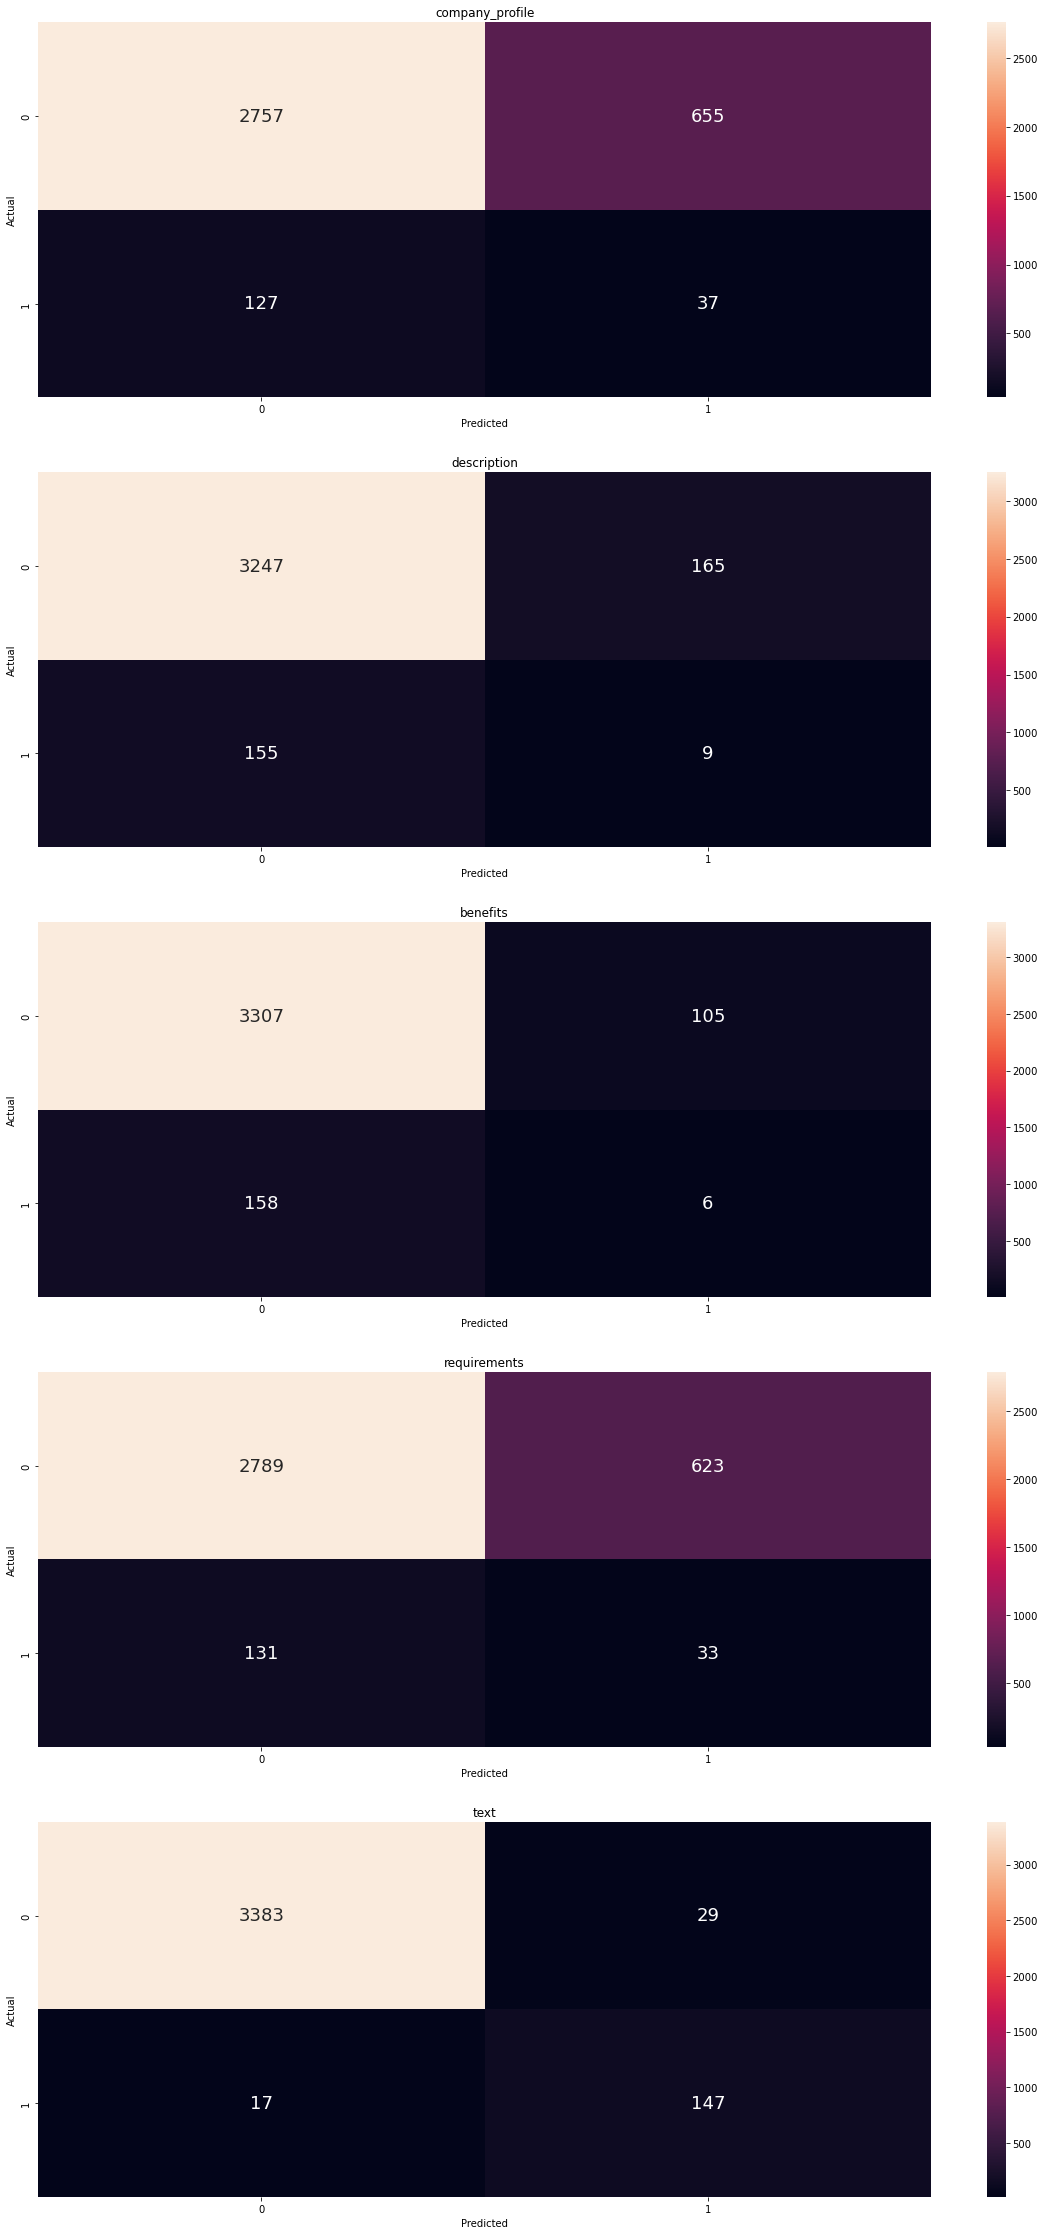

In [13]:

f, axes = plt.subplots(5, 1, figsize = (20,40))
for i in range(len(cm_predicted)):
    cm = confusion_matrix(y_test, cm_predicted[i], labels=sgd.classes_)
    s = sb.heatmap(cm, annot = True, fmt='.0f', annot_kws = {"size":18}, ax = axes[i])
    s.set(xlabel='Predicted',ylabel='Actual', title=cat_var[i])


# Understanding confusion matrix #
00: True Positive - Job postings that are legitimate and identified as legitimate

11: True Negative - Job postings that are fraudulent and identified as fraudulent

01: False Positive - Job postings that are legitimate but identified as fraudulent

10: False Negative - Job postings that are fraudulent but identified as legitimate

# Random Forest Classifier

In [14]:
start = time.time()
regr=RandomForestClassifier(n_estimators = 200, class_weight = "balanced", max_features = "sqrt", random_state = 420)
cat_var = ["company_profile","description","benefits","requirements", "text"]

cm_predicted = []
for var in cat_var:
    print("======================")
    print(f"Prediction of {var}")
    print("======================")
    y = train_data["fraudulent"]
    X = train_data[var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    tfidf = TfidfVectorizer()
    tfidf.fit(X_train)
    X_train_tfidf = tfidf.transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    kfcv(regr,X_train_tfidf, y_train)
    
    regr.fit(X_train_tfidf, y_train)
    y_predicted = regr.predict(X_test_tfidf)
    print(classification_report(y_test, y_predicted))
    cm_predicted.append(y_predicted)
    
end = time.time()
print("Time taken: " + str(round(end - start, 3)) +"s")

Prediction of company_profile
F1 Score 1: 0.39
F1 Score 2: 0.37
F1 Score 3: 0.35
F1 Score 4: 0.38
F1 Score 5: 0.39
Total F1 Mean: 0.37
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3379
           1       0.26      0.99      0.41       197

    accuracy                           0.85      3576
   macro avg       0.63      0.91      0.66      3576
weighted avg       0.96      0.85      0.88      3576

Prediction of description
F1 Score 1: 0.66
F1 Score 2: 0.69
F1 Score 3: 0.66
F1 Score 4: 0.61
F1 Score 5: 0.69
Total F1 Mean: 0.66
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3406
           1       0.99      0.54      0.69       170

    accuracy                           0.98      3576
   macro avg       0.98      0.77      0.84      3576
weighted avg       0.98      0.98      0.97      3576

Prediction of benefits
F1 Score 1: 0.15
F1 Score 2: 0.17
F1 Score 3: 0.17
F1 Sco

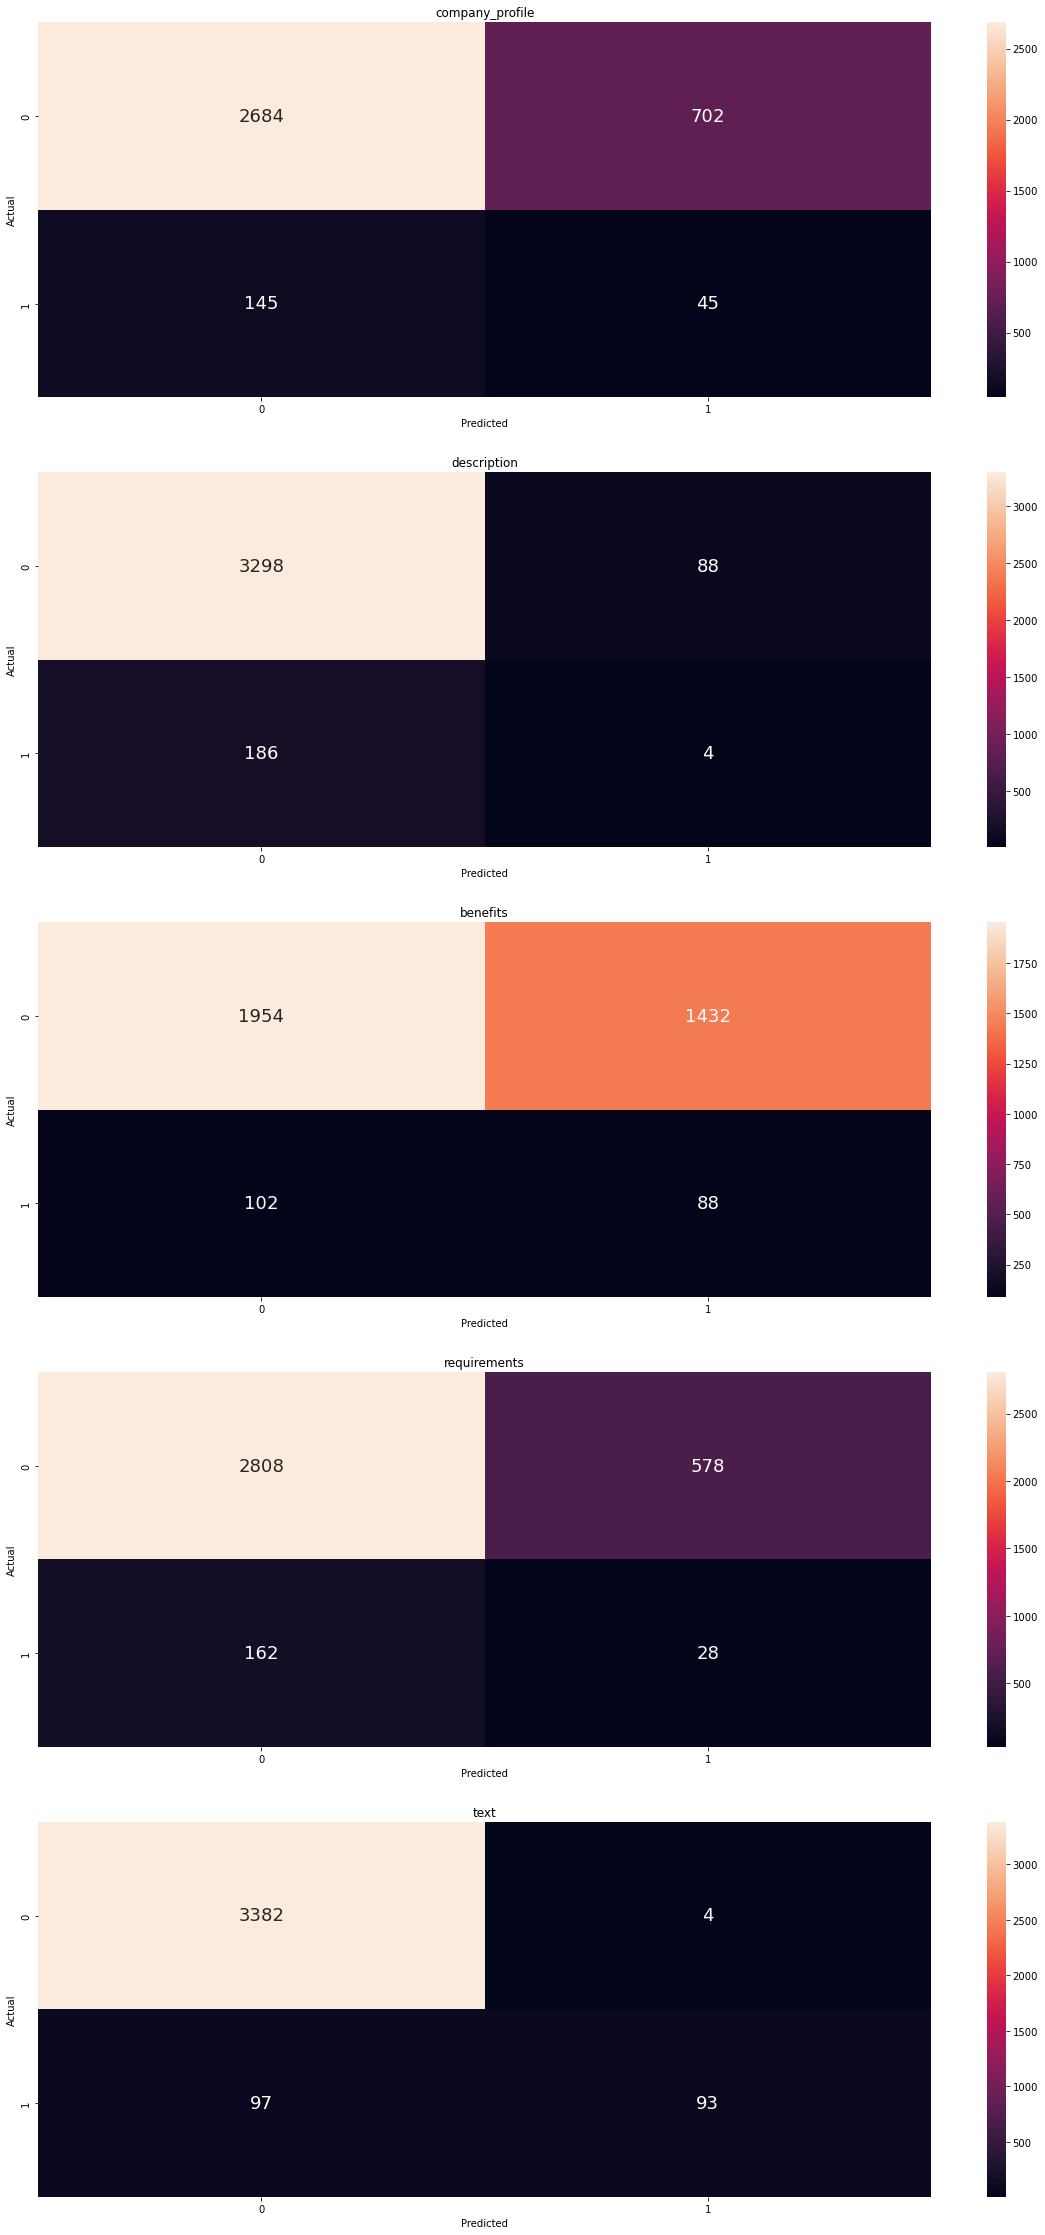

In [15]:
f, axes = plt.subplots(5, 1, figsize = (20,40))
for i in range(len(cm_predicted)):
    cm = confusion_matrix(y_test, cm_predicted[i], labels=regr.classes_)
    s = sb.heatmap(cm, annot = True, fmt='.0f', annot_kws = {"size":18}, ax = axes[i])
    s.set(xlabel='Predicted',ylabel='Actual', title=cat_var[i])


# K-Neighbours #


In [16]:
start = time.time()
neigh = KNeighborsClassifier(weights="distance")

cat_var = ["company_profile","description","benefits","requirements", "text"]

cm_predicted = []
for var in cat_var:
    print("======================")
    print(f"Prediction of {var}")
    print("======================")
    y = train_data["fraudulent"]
    X = train_data[var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    tfidf = TfidfVectorizer()
    tfidf.fit(X_train)
    X_train_tfidf = tfidf.transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    kfcv(neigh,X_train_tfidf, y_train)
    
    neigh.fit(X_train_tfidf, y_train)
    y_predicted = neigh.predict(X_test_tfidf)
    print(classification_report(y_test, y_predicted))
    cm_predicted.append(y_predicted)

end = time.time()
print("Time taken: " + str(round(end - start, 3)) +"s")



Prediction of company_profile
F1 Score 1: 0.46
F1 Score 2: 0.48
F1 Score 3: 0.37
F1 Score 4: 0.52
F1 Score 5: 0.45
Total F1 Mean: 0.46
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3384
           1       0.98      0.28      0.44       192

    accuracy                           0.96      3576
   macro avg       0.97      0.64      0.71      3576
weighted avg       0.96      0.96      0.95      3576

Prediction of description
F1 Score 1: 0.76
F1 Score 2: 0.75
F1 Score 3: 0.71
F1 Score 4: 0.71
F1 Score 5: 0.72
Total F1 Mean: 0.73
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3410
           1       0.82      0.64      0.72       166

    accuracy                           0.98      3576
   macro avg       0.90      0.82      0.85      3576
weighted avg       0.98      0.98      0.98      3576

Prediction of benefits
F1 Score 1: 0.62
F1 Score 2: 0.51
F1 Score 3: 0.47
F1 Sco

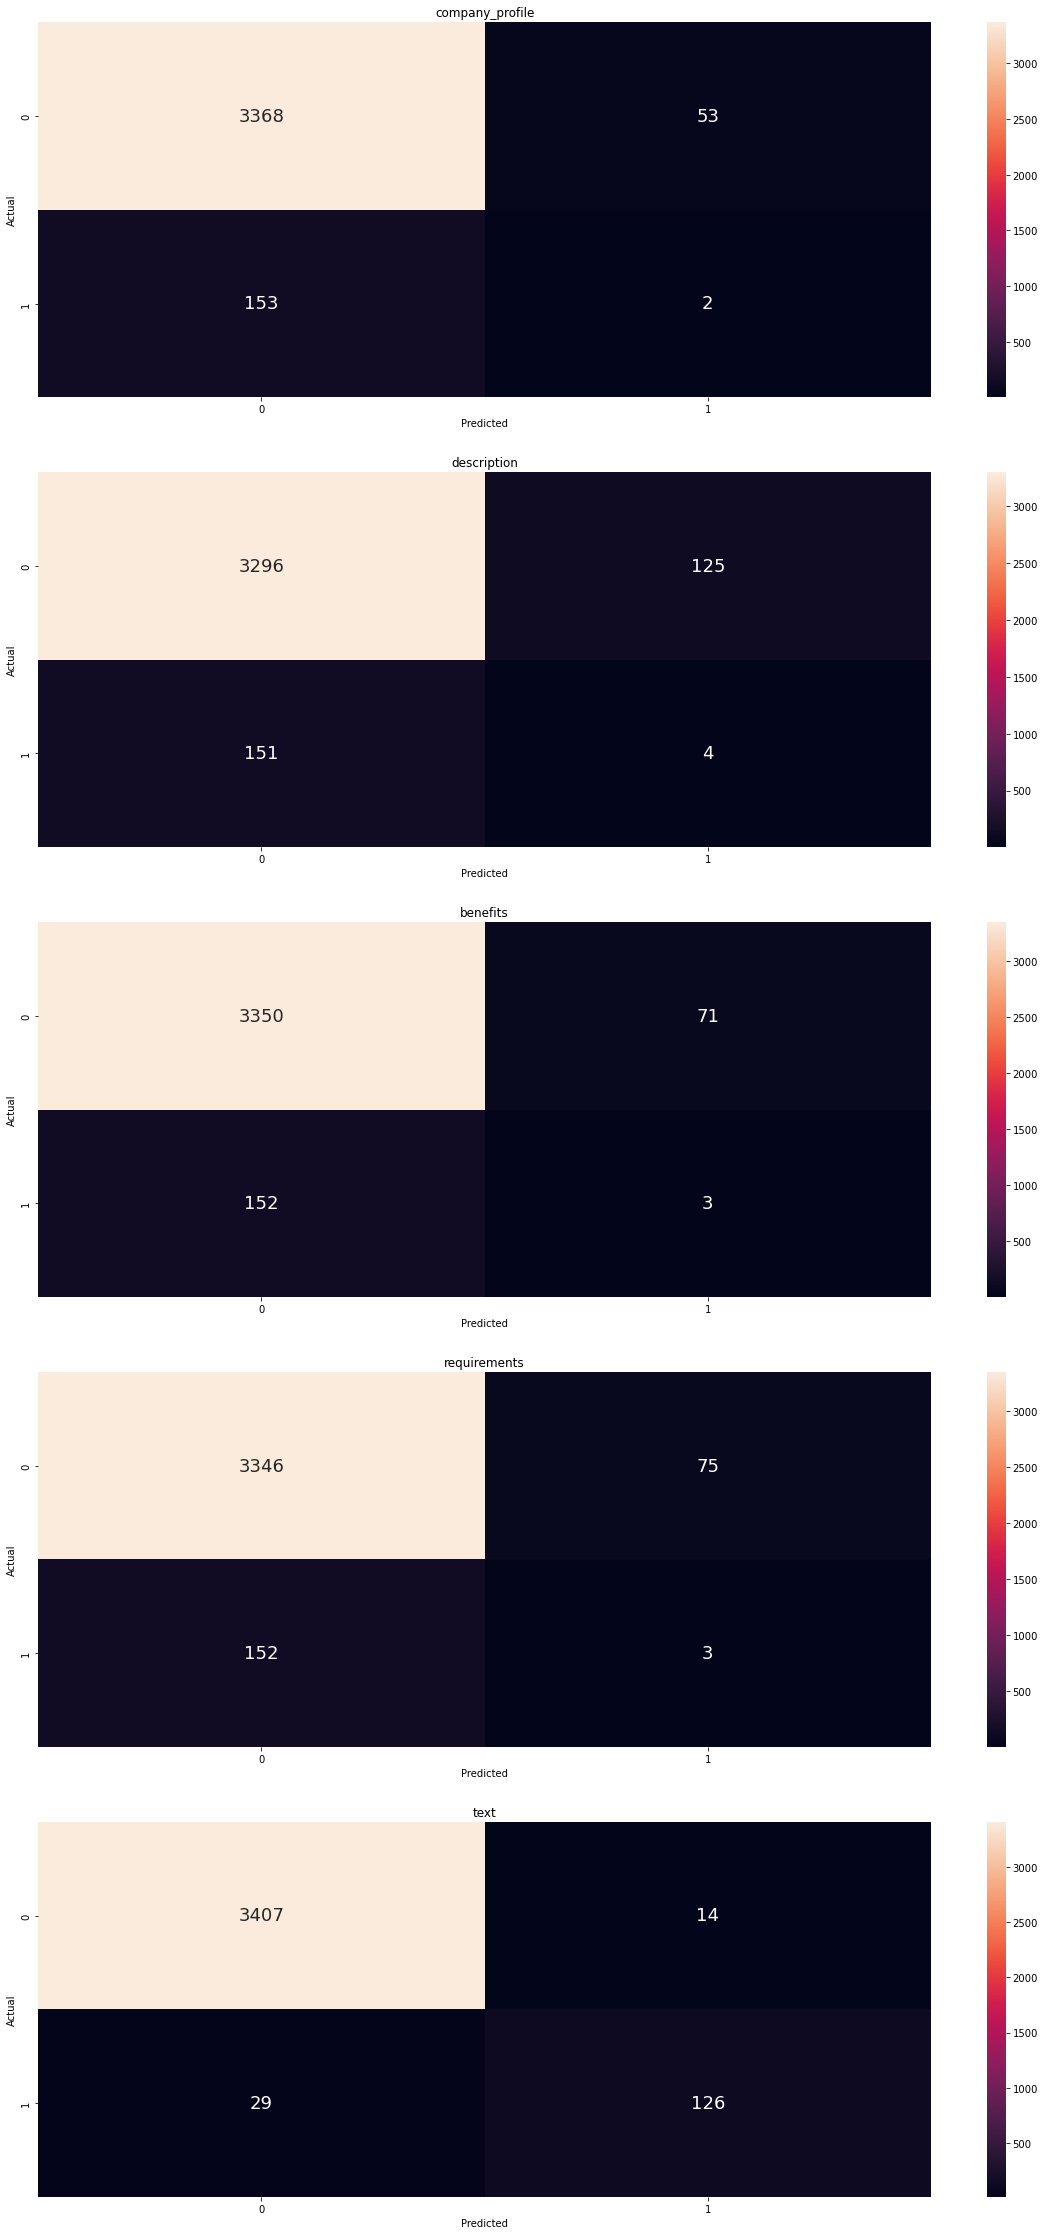

In [17]:
f, axes = plt.subplots(5, 1, figsize = (20,40))
for i in range(len(cm_predicted)):
    cm = confusion_matrix(y_test, cm_predicted[i], labels=neigh.classes_)
    s = sb.heatmap(cm, annot = True, fmt='.0f', annot_kws = {"size":18}, ax = axes[i])
    s.set(xlabel='Predicted',ylabel='Actual', title=cat_var[i])

# Keras (Very Hardware Intensive) #
Lack of ha

In [11]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [14]:
def keras_model(train_X,train_y,test_X):
    model.load_weights('model.h5')
    model.fit(train_X,train_y, epochs = 5)
    pred_cv = model.predict(test_X)
    pred_cv = np.around(pred_cv , decimals = 0)
    return pred_cv

In [18]:
cat_var = ["company_profile","description","benefits","requirements", "text"]
#cat_var = ["company_profile"]
cm_predicted = []
for var in cat_var:
    print("======================")
    print(f"Prediction of {var}")
    print("======================")
    
    y = train_data["fraudulent"]
    X = train_data[var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    tfidf = TfidfVectorizer()
    tfidf.fit(X_train)
    X_train_tfidf = tfidf.transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    
    # model specifications
    #=============================================================================================
    model = Sequential()
    #model.add(Dense(units = 2000, activation = 'relu',input_dim=X_train_tfidf.shape[1]))
    #model.add(Dense(units = 1500 , activation = 'relu'))
    #model.add(Dense(units = 750 , activation = 'relu'))
    #model.add(Dense(units = 325 , activation = 'relu'))
    #model.add(Dense(units = 160 , activation = 'relu'))
    #model.add(Dense(units = 50 , activation = 'relu',input_dim=X_train_tfidf.shape[1]))
    model.add(Dense(units = 25 , activation = 'relu',input_dim=X_train_tfidf.shape[1]))
    model.add(Dense(units = 12 , activation = 'relu'))
    model.add(Dense(units = 1 , activation = 'sigmoid'))
    model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

    #saving weights before running kfold to retain integrity
    model.save_weights('model.h5')
    #==============================================================================================
    
    
    X_train_tfidf = X_train_tfidf.astype(np.float32)
    X_test_tfidf = X_test_tfidf.astype(np.float32)
    X_train_tfidf = X_train_tfidf.toarray()
    X_test_tfidf = X_test_tfidf.toarray()
    
    fold_no = 1
    scores = []
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=420)
    for train, test in kfold.split(X_train_tfidf,y_train):

        #resets model to starting point
        model.load_weights('model.h5')
        train_X, test_X = X_train_tfidf[train], X_train_tfidf[test]
        train_y, test_y = y_train.iloc[train], y_train.iloc[test]

        print('------------------------------------------------------------------------')
        print(f'Training for fold {fold_no} ...')
        pred_cv = keras_model(train_X, train_y, test_X)
        scores.append(f1_score(test_y,pred_cv))
        # Increase fold number
        fold_no = fold_no + 1

        #garbage collection
        tf.keras.backend.clear_session()
        del train_X,test_X,train_y,test_y,pred_cv
        gc.collect()
    
    print() 
    total = 0
    count = 1
    for sc in scores:
        total = total + sc
        print(f"F1 Score of Fold {count}: {sc: .5f}")
        count +=1

    total = total/(fold_no-1)
    print(f"F1 Score Mean:      {total: .5f}")
    print("======================================")
    print("Test Set")
    print("======================================")
    tf.keras.backend.clear_session()
    gc.collect()
    
    model.load_weights('model.h5')
    pred_cv = keras_model(X_train_tfidf,y_train,X_test_tfidf)
    pred_cv = np.around(pred_cv , decimals = 0)
    print(classification_report(y_test, pred_cv))
    cm_predicted.append(pred_cv)
    
    tf.keras.backend.clear_session()
    gc.collect()

Prediction of company_profile
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
358/358 [==============================] - 2s 4ms/step - loss: 0.1875 - accuracy: 0.9538
Epoch 2/5
358/358 [==============================] - 1s 3ms/step - loss: 0.0991 - accuracy: 0.9638
Epoch 3/5
358/358 [==============================] - 1s 3ms/step - loss: 0.0896 - accuracy: 0.9668
Epoch 4/5
358/358 [==============================] - 1s 3ms/step - loss: 0.0872 - accuracy: 0.9674
Epoch 5/5
358/358 [==============================] - 1s 3ms/step - loss: 0.0862 - accuracy: 0.9675
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
358/358 [==============================] - 1s 3ms/step - loss: 0.1516 - accuracy: 0.9537
Epoch 2/5
358/358 [==============================] - 1s 3ms/step - loss: 0.0975 - accuracy: 0.9631
Epoch 3/5
358/358 [==============================] - 1s 3ms/step - loss: 0.0905 - a

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [10]:
tf.keras.backend.clear_session()
#del train_X,test_X,train_y,test_y,pred_cv
gc.collect()

3664

<AxesSubplot:>

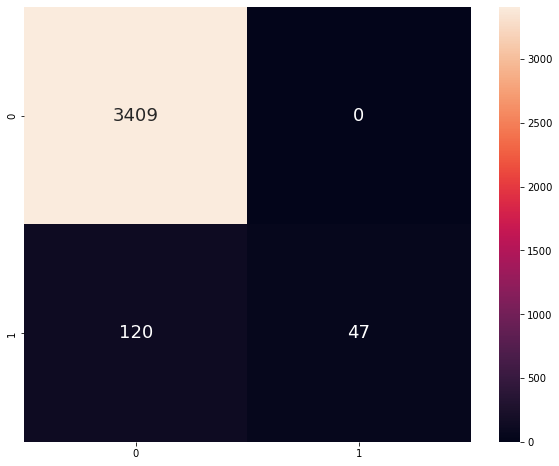

In [16]:
plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test,pred_cv)
sb.heatmap(cm, annot = True, fmt='.0f', annot_kws = {"size":18})

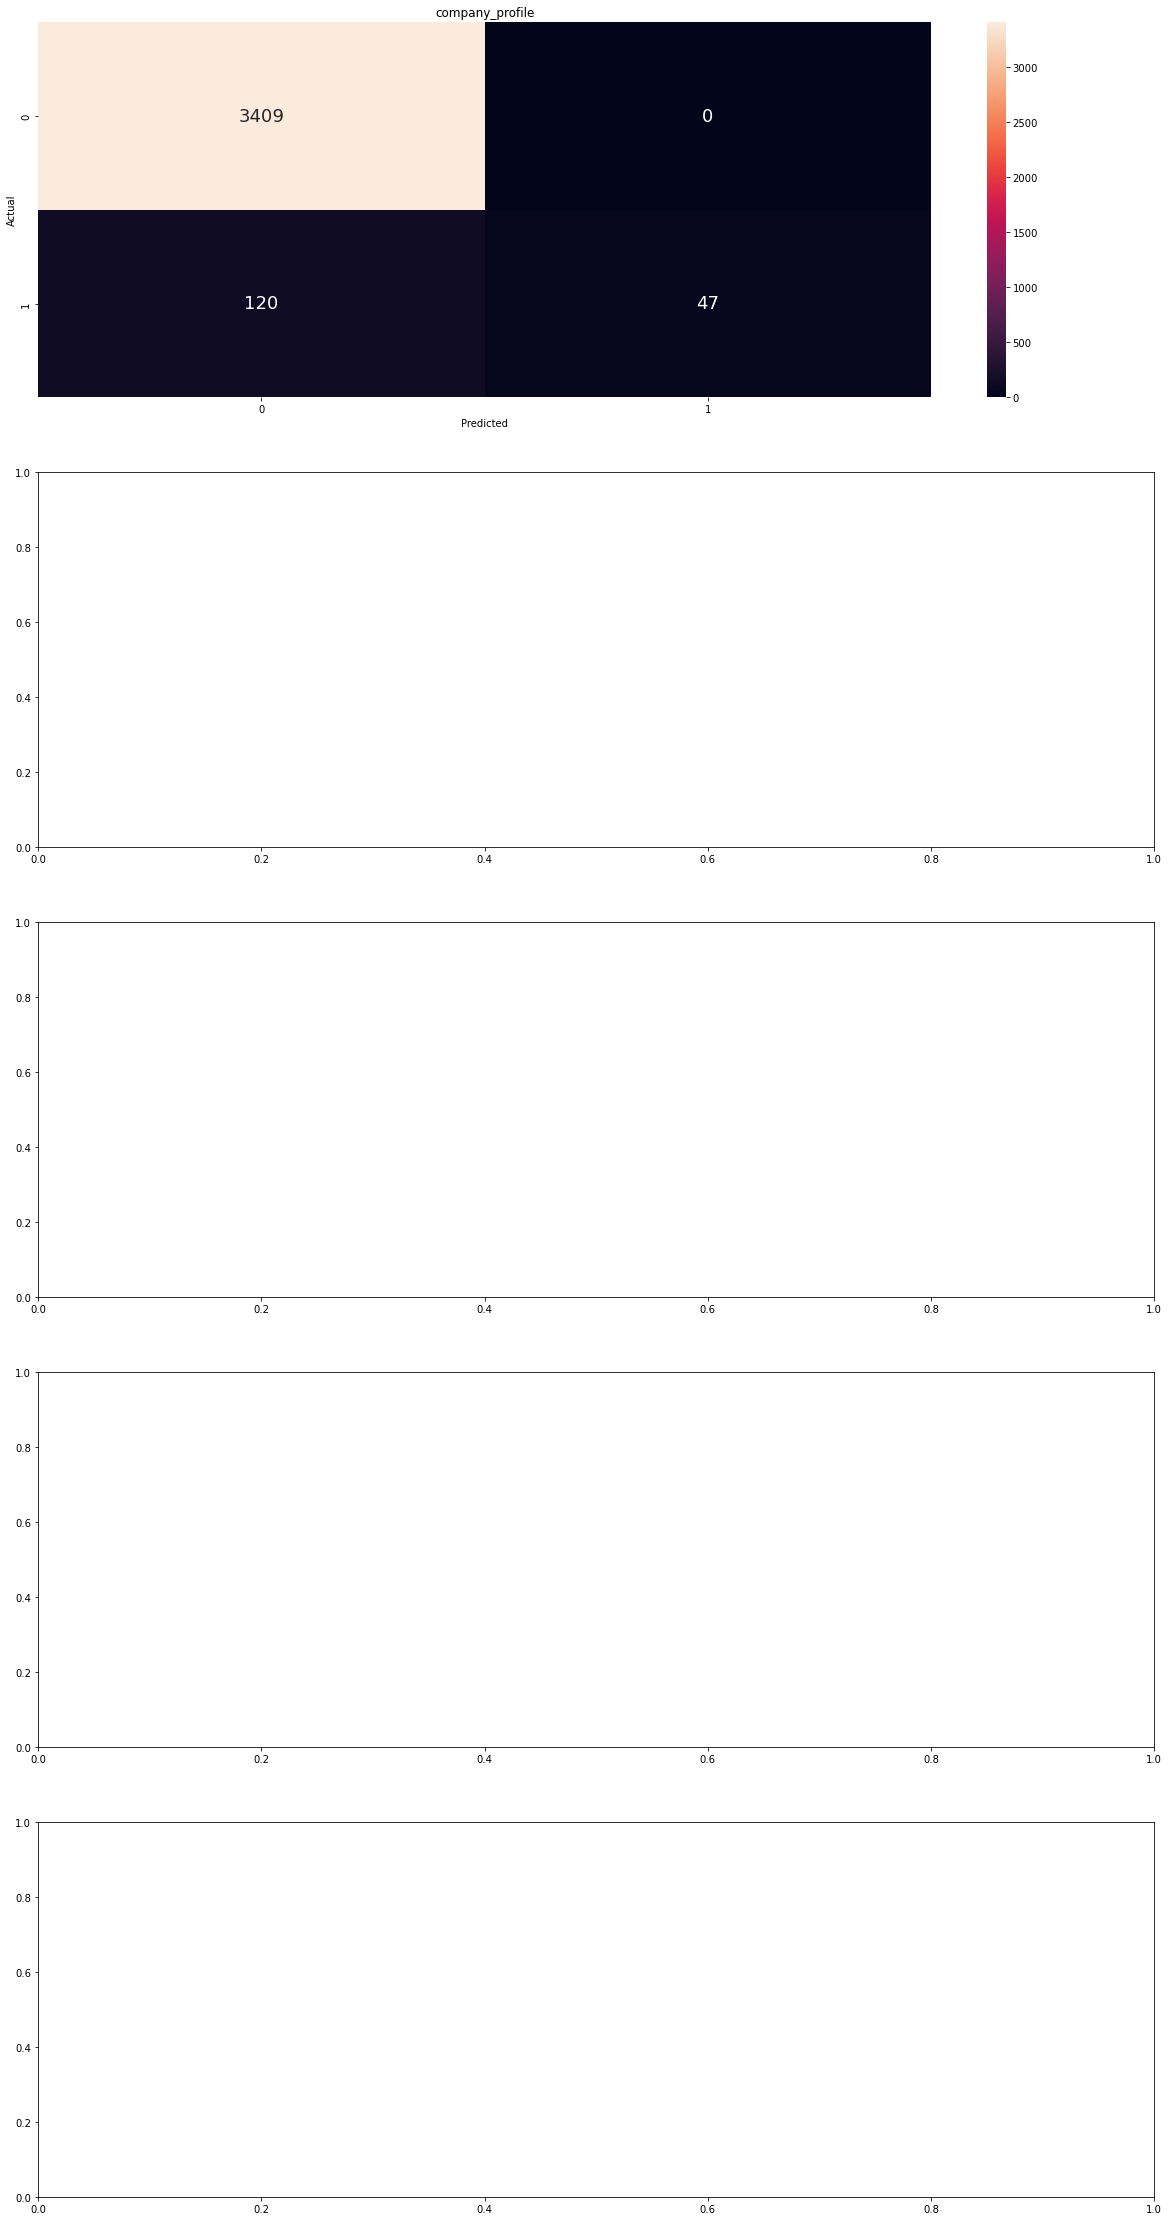

In [17]:
f, axes = plt.subplots(5, 1, figsize = (20,40))
for i in range(len(cm_predicted)):
    cm = confusion_matrix(y_test, cm_predicted[i])
    s = sb.heatmap(cm, annot = True, fmt='.0f', annot_kws = {"size":18}, ax = axes[i])
    s.set(xlabel='Predicted',ylabel='Actual', title=cat_var[i])